In [5]:
!pip install imblearn

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_curve,precision_score,recall_score,roc_auc_score,make_scorer
from matplotlib.colors import Normalize
import pandas as pd
from pandas.core.frame import DataFrame 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler,BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler

In [11]:
def metric(y_test,y_pred):
    cm=confusion_matrix(y_test, y_pred)
    tp=cm[1][1] #vrai positifs 
    tn=cm[0][0] #vrai negatifs
    fp=cm[0][1] #faux positifs
    fn=cm[1][0] #faux negatifs
    score=(2*((tp+tn)/y_test.size) + 5*(tp/(fn+tp)))/7 #(2*accuracy + 5*rappel)/7
#     print(f"score : {score} soit {score* 100:.2f}%")
    return float(score)

In [12]:
def random_forest_classifier(X_tr,y_tr,X_ts,y_ts):
    #50 arbres de décision 
    rf_classifier = RandomForestClassifier(n_estimators=50)
    rf_classifier.fit(X_tr, y_tr)
    y_pred = rf_classifier.predict(X_test)
    #performances
    print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
    print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
    print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
    print('roc_auc_score : {0:0.5f}'.format(roc_auc_score(y_ts , y_pred)))
    print('metrique personnalisée (MP): {}'.format(metric(y_ts,y_pred)))
    print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")
    sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')
    plt.title('Matrice de confusion', y=1.1, fontsize = 22)
    plt.xlabel('Prédit',fontsize = 18)
    plt.ylabel('Réel',fontsize = 18)
    plt.show()

********** random_forest_classifier APRES RUS **********
Precision : 0.06085
Recall : 0.91089
F1 : 0.11407
roc_auc_score : 0.94296
metrique personnalisée (MP): 0.9291830922096158
\\Matrice de confusion ///:- 
 [[55441  1420]
 [    9    92]]


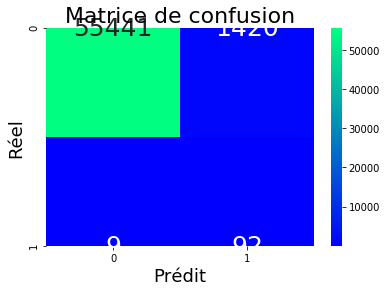

********** random_forest_classifier APRES ROS **********
Precision : 0.93182
Recall : 0.81188
F1 : 0.86772
roc_auc_score : 0.90589
metrique personnalisée (MP): 0.8655040232037369
\\Matrice de confusion ///:- 
 [[56855     6]
 [   19    82]]


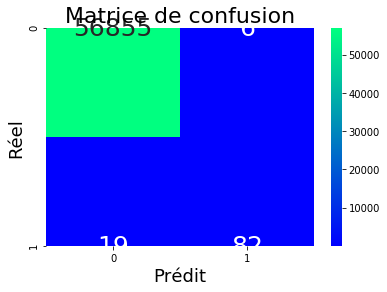

********** random_forest_classifier APRES SMOTE **********
Precision : 0.88298
Recall : 0.82178
F1 : 0.85128
roc_auc_score : 0.91079
metrique personnalisée (MP): 0.8725560954877633
\\Matrice de confusion ///:- 
 [[56850    11]
 [   18    83]]


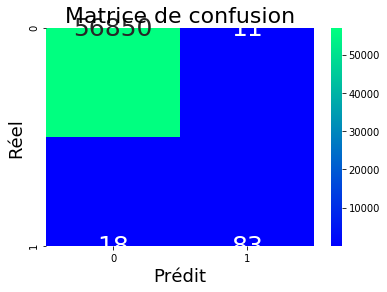

********** random_forest_classifier APRES ADASYN SMOTE **********
Precision : 0.84536
Recall : 0.81188
F1 : 0.82828
roc_auc_score : 0.90581
metrique personnalisée (MP): 0.8654588803265304
\\Matrice de confusion ///:- 
 [[56846    15]
 [   19    82]]


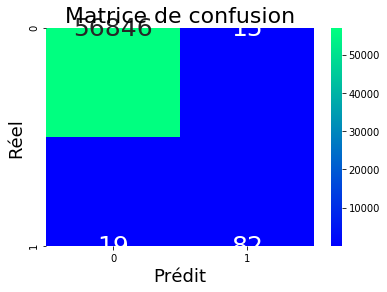

********** random_forest_classifier APRES BORDERLINE SMOTE **********
Precision : 0.90323
Recall : 0.83168
F1 : 0.86598
roc_auc_score : 0.91576
metrique personnalisée (MP): 0.8796432788985058
\\Matrice de confusion ///:- 
 [[56852     9]
 [   17    84]]


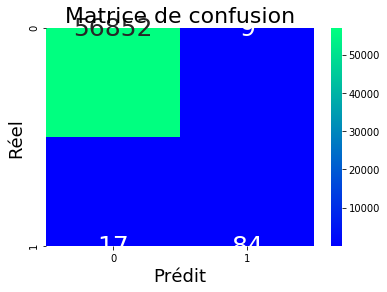

In [13]:
df = pd.read_csv('creditcard.csv').astype(np.float32)
Sc=StandardScaler()
Amount=df["Amount"].values
df["Amount"]=Sc.fit_transform(Amount.reshape(-1,1))
Time=df["Time"].values
df["Time"]=Sc.fit_transform(Time.reshape(-1,1))
x = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
#ré-echantillonnage des données d'apprentissage 
rus=RandomUnderSampler() #SOUS-ECHANTILLONNAGE ALEATOIRE
X_train_rus, y_train_rus = rus.fit_resample(X_train, Y_train)

ros=RandomOverSampler() #SUR-ECHANTILLONNAGE ALEATOIRE
X_train_ros, y_train_ros = ros.fit_resample(X_train, Y_train)

smt=SMOTE() #SMOTE
X_train_smt, y_train_smt = smt.fit_resample(X_train, Y_train)

ada=ADASYN() #ADASYN-SMOTE
X_train_ada, y_train_ada = ada.fit_resample(X_train, Y_train)

Bl=BorderlineSMOTE() #BORDERLINE-SMOTE
X_train_Bl, y_train_Bl = Bl.fit_resample(X_train, Y_train)

print("*"*10,"random_forest_classifier APRES RUS","*"*10)
random_forest_classifier(X_train_rus,y_train_rus,X_test,Y_test)
print("*"*10,"random_forest_classifier APRES ROS","*"*10)
random_forest_classifier(X_train_ros,y_train_ros,X_test,Y_test)
print("*"*10,"random_forest_classifier APRES SMOTE","*"*10)
random_forest_classifier(X_train_smt,y_train_smt,X_test,Y_test)
print("*"*10,"random_forest_classifier APRES ADASYN SMOTE","*"*10)
random_forest_classifier(X_train_ada,y_train_ada,X_test,Y_test)
print("*"*10,"random_forest_classifier APRES BORDERLINE SMOTE","*"*10)
random_forest_classifier(X_train_Bl,y_train_Bl,X_test,Y_test)